In [4]:
'''Created by Giani Ranzetti on 30.11.2024'''

'Created by Giani Ranzetti on 30.11.2024'

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns

### Naive montecarlo functions and importance sampling functions


In [2]:
class BarrierOptionPricer:
    def __init__(self, S0, K, H, T, r, sigma, q=0, simulations=1000, steps=100):
        self.S0 = S0         # Spot price
        self.K = K           # Strike price
        self.H = H           # Barrier level
        self.T = T           # Time to maturity
        self.r = r           # Risk-free interest rate
        self.q = q           # Dividend yield
        self.sigma = sigma   # Volatility
        self.simulations = simulations
        self.steps = steps
        
    def _simulate_naive_paths(self):
        """Utility method to simulate price paths based on the Monte Carlo method."""
        dt = self.T / self.steps
        nudt = ((self.r - self.q) - 0.5 * self.sigma ** 2) * dt
        volsdt = self.sigma * np.sqrt(dt)
        
        # Monte Carlo simulation
        Z = np.random.normal(size=(self.steps, self.simulations))
        delta_St = nudt + volsdt * Z
        ST = self.S0 * np.cumprod(np.exp(delta_St), axis=0)
        ST = np.concatenate((np.full(shape=(1, self.simulations), fill_value=self.S0), ST))
        return ST
    
    def BarrierCorrection(self):
        """The Broadie and Glasserman (1997) continuous barrier correction method """
        Beta = 0.5826
        
        if self.H > self.K:
            self.H = self.H * np.exp(Beta*self.sigma*np.sqrt(self.T/self.steps))
        else:
            self.H = self.H * np.exp(-Beta*self.sigma*np.sqrt(self.T/self.steps))
    
    # Up-and-Out Put Option
    def UOPutprice(self, Graph=True, Annot = True):
        """Method to price the up-and-out put option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_naive_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        if Annot:
            print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
            print("Computation time is: ", round(time.time() - start_time,4))
            
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-Out Put Option')
            plt.show()
        
        return C0, SE
            
    # Up-and-In Put Option
    def UIPutprice(self, Graph=True, Annot = True):
        """Method to price the up-and-in put option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_naive_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)

        if Annot:
            print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
            print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-In Put Option')
            plt.show()
        
        return C0, SE
            
    # Down-and-Out Put Option
    def DOPutprice(self, Graph=True, Annot = True):
        """Method to price the down-and-out put option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_naive_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)

        if Annot:
            print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
            print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-Out Put Option')
            plt.show()
    
        return C0, SE
    
    # Down-and-In Put Option
    def DIPutprice(self, Graph=True, Annot = True):
        """Method to price the down-and-in put option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_naive_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)

        if Annot:
            print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
            print("Computation time is: ", round(time.time() - start_time,4))

        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-In Put Option')
            plt.show()
            
        return C0, SE
    
    # Up-and-Out Call Option
    def UOCallprice(self, Graph=True, Annot = True):
        """Utility method to price the up-and-out call option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_naive_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        if Annot:
            print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
            print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-Out Call Option')
            plt.show()
        
        return C0, SE
    
    # Up-and-In Call Option
    def UICallprice(self, Graph=True, Annot = True):
        """Utility method to price the up-and-in call option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_naive_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        if Annot:
            print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
            print("Computation time is: ", round(time.time() - start_time,4))
        
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-In Call Option')
            plt.show()
    
        return C0, SE
            
    # Down-and-Out Call Option
    def DOCallprice(self, Graph=True, Annot = True):
        """Method to price the down-and-out call option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_naive_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)

        if Annot:
            print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
            print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-Out Call Option')
            plt.show()
        
        return C0, SE
            
    # Down-and-In Call Option
    def DICallprice(self, Graph=True, Annot = True):
        """Method to price the down-and-in call option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_naive_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)

        if Annot:
            print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
            print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-In Call Option')
            plt.show()
        
        return C0, SE
    
    # Closed-form solution for Down-and-out & Down-and-In call option from the Hull Textbook (2002)
    def ClosedForm_Down_Call(self):
        if self.H <= self.K:
            # Pricing a Down and In Call Option
            lambd = (self.r - self.q + 0.5 * self.sigma**2) / (self.sigma**2)
            
            y = (np.log(self.H**2 / (self.S0 * self.K)) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            
            DI_term1 = self.S0 * np.exp(-self.q * self.T) * ((self.H / self.S0) ** (2 * lambd)) * norm.cdf(y)
            DI_term2 = self.K * np.exp(-self.r * self.T) * ((self.H / self.S0) ** (2 * lambd - 2)) * norm.cdf(y - self.sigma * np.sqrt(self.T))
            
            C_di = DI_term1 - DI_term2
            
            # Pricing a Vanilla Call
            d1 = (np.log(self.S0 / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
            d2 = d1 - self.sigma * np.sqrt(self.T)
            
            C = self.S0 * np.exp(-self.q * self.T) * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
            
            C_do = C - C_di
            
            return C_di, C_do
        
        else:
            lambd = (self.r - self.q + 0.5 * self.sigma**2) / (self.sigma**2)
            
            x1 = (np.log(self.S0 / self.H) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            x2 = x1 - self.sigma * np.sqrt(self.T)
            
            y1 = (np.log(self.H / self.S0) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            y2 = y1 - self.sigma * np.sqrt(self.T)
            
            term1 = self.S0 * np.exp(-self.q * self.T) * norm.cdf(x1)
            term2 = self.K * np.exp(-self.r * self.T) * norm.cdf(x2)
            term3 = self.S0 * np.exp(-self.q * self.T) * ((self.H / self.S0) ** (2 * lambd)) * norm.cdf(y1)
            term4 = self.K * np.exp(-self.r * self.T) * ((self.H / self.S0) ** (2 * lambd - 2)) * norm.cdf(y2)

            C_do = term1 - term2 - term3 + term4
            
            # Pricing a Vanilla Call
            d1 = (np.log(self.S0 / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
            d2 = d1 - self.sigma * np.sqrt(self.T)
            
            C = self.S0 * np.exp(-self.q * self.T) * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
            
            C_di = C - C_do
            
            return C_di, C_do

    def ClosedForm_Up_Call(self):
        if self.H <= self.K:
            C_uo = 0
            
            d1 = (np.log(self.S0 / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
            d2 = d1 - self.sigma * np.sqrt(self.T)
            C_ui = self.S0 * np.exp(-self.q * self.T) * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
            
            return C_ui, C_uo
        
        else:
            lambd = (self.r - self.q + 0.5 * self.sigma**2) / (self.sigma**2)
            x1 = (np.log(self.S0 / self.H) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            y1 = (np.log(self.H / self.S0) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            y = (np.log(self.H**2 / (self.S0 * self.K)) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            
            term1 = self.S0 * np.exp(-self.q * self.T) * norm.cdf(x1)
            term2 = self.K * np.exp(-self.r * self.T) * norm.cdf(x1 - self.sigma * np.sqrt(self.T))
            term3 = self.S0 * np.exp(-self.q * self.T) * ((self.H / self.S0) ** (2 * lambd)) * (norm.cdf(-y) - norm.cdf(-y1))
            term4 = self.K * np.exp(-self.r * self.T) * ((self.H / self.S0) ** (2 * lambd - 2)) * (norm.cdf(-y + self.sigma * np.sqrt(self.T)) - norm.cdf(-y1 + self.sigma * np.sqrt(self.T)))

            C_ui = term1 - term2 - term3 + term4
            
            # Pricing a Vanilla Call
            d1 = (np.log(self.S0 / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
            d2 = d1 - self.sigma * np.sqrt(self.T)
            
            C = self.S0 * np.exp(-self.q * self.T) * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
            
            C_uo = C - C_ui
            
            return C_ui, C_uo
    
    def ClosedForm_Down_Put(self):
        if self.H > self.K:
            P_do = 0
            
            # Pricing a Vanilla Put
            d1 = (np.log(self.S0 / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
            d2 = d1 - self.sigma * np.sqrt(self.T)
            
            P_di = self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S0 * np.exp(-self.q * self.T) * norm.cdf(-d1)
            
            return P_di, P_do
        else:
            lambd = (self.r - self.q + 0.5 * self.sigma**2) / (self.sigma**2)
            x1 = (np.log(self.S0 / self.H) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            y1 = (np.log(self.H / self.S0) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            y = (np.log(self.H**2 / (self.S0 * self.K)) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            
            term1 = -self.S0 * np.exp(-self.q * self.T) * norm.cdf(-x1)
            term2 = self.K * np.exp(-self.r * self.T) * norm.cdf(-x1 + self.sigma * np.sqrt(self.T))
            term3 = self.S0 * np.exp(-self.q * self.T) * ((self.H / self.S0) ** (2 * lambd)) * (norm.cdf(y) - norm.cdf(y1))
            term4 = self.K * np.exp(-self.r * self.T) * ((self.H / self.S0) ** (2 * lambd - 2)) * (norm.cdf(y - self.sigma * np.sqrt(self.T)) - norm.cdf(y1 - self.sigma * np.sqrt(self.T)))

            P_di = term1 + term2 + term3 - term4
            
            # Pricing a Vanilla Put
            d1 = (np.log(self.S0 / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
            d2 = d1 - self.sigma * np.sqrt(self.T)
            
            P = self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S0 * np.exp(-self.q * self.T) * norm.cdf(-d1)
            
            P_do = P - P_di
            
            return P_di, P_do
            
    def ClosedForm_Up_Put(self):
        if self.H >= self.K:
            lambd = (self.r - self.q + 0.5 * self.sigma**2) / (self.sigma**2)
            y = (np.log(self.H**2 / (self.S0 * self.K)) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            
            term1 = -self.S0 * np.exp(-self.q * self.T) * ((self.H / self.S0) ** (2 * lambd)) * norm.cdf(-y)
            term2 = self.K * np.exp(-self.r * self.T) * ((self.H / self.S0) ** (2 * lambd - 2)) * norm.cdf(-y + self.sigma * np.sqrt(self.T))
            
            P_ui = term1 + term2
            
            # Pricing a Vanilla Put
            d1 = (np.log(self.S0 / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
            d2 = d1 - self.sigma * np.sqrt(self.T)
            
            P = self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S0 * np.exp(-self.q * self.T) * norm.cdf(-d1)
            
            P_uo = P - P_ui
            
            return P_ui, P_uo
        
        else:
            lambd = (self.r - self.q + 0.5 * self.sigma**2) / (self.sigma**2)
            x1 = (np.log(self.S0 / self.H) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            y1 = (np.log(self.H / self.S0) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            
            term1 = -self.S0 * np.exp(-self.q * self.T) * norm.cdf(-x1)
            term2 = self.K * np.exp(-self.r * self.T) * norm.cdf(-x1 + self.sigma * np.sqrt(self.T))
            term3 = self.S0 * np.exp(-self.q * self.T) * ((self.H / self.S0) ** (2 * lambd)) * norm.cdf(-y1)
            term4 = self.K * np.exp(-self.r * self.T) * ((self.H / self.S0) ** (2 * lambd - 2)) * norm.cdf(-y1 + self.sigma * np.sqrt(self.T))

            P_uo = term1 - term2 - term3 + term4
            
            # Pricing a Vanilla Put
            d1 = (np.log(self.S0 / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
            d2 = d1 - self.sigma * np.sqrt(self.T)
            
            P = self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S0 * np.exp(-self.q * self.T) * norm.cdf(-d1)
            
            P_ui = P - P_uo
            
            return P_ui, P_uo
    
    # Vanilla Call Option
    def VanillaCallprice(self, paths, Graph=True, Annot = True):
        """Method to price the vanilla call option."""
        start_time = time.time()
        S = paths.copy()

        CT = np.maximum(0, S[-1][S[-1] != 0] - self.K)
        C0 = np.exp(-(self.r - self.q) *self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(- (self.r - self.q) *self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        successful_paths = S[-1] > self.K
        
        if Annot:
            print('-' * 70)
            print(f"{'European Vanilla Call Option Pricing':^70}")
            print('-' * 70)
            print(f"{'Call Value:':<30} ${C0:.4f}")
            print(f"{'Standard Error (SE):':<30} ±{SE:.4f}")
            print(f"{'Total Simulations (Paths):':<30} {self.simulations:,}")
            print(f"{'Successful Paths:':<30} {np.sum(successful_paths):,} "
                f"({np.sum(successful_paths) / self.simulations * 100:.2f}%)")
            print('-' * 70)
            print(f"{'Computation Time:':<30} {round(time.time() - start_time, 4)} seconds")
            print('-' * 70)

        # Create a dataframe to create comprehensive graphs
        times = np.linspace(0, self.T, self.steps + 1)
        
        plotdata = pd.DataFrame(paths)
        plotdata['times'] = times
        plotdata = pd.melt(plotdata, id_vars='times')
        plotdata['variable'] = plotdata['variable'].astype(np.int64)
        # Add a column to identify successful paths
        plotdata['successful paths'] = plotdata['variable'].isin(np.where(successful_paths)[0])

        if Graph:
            plt.figure(figsize=(16, 6)) 
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            # First subplot: Path Visualization
            palette = {True: '#076a38', False: '#a50026'}
            plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
            sns.lineplot(x='times', y='value', units='variable', estimator=None, lw=1., data=plotdata, hue = 'successful paths', legend=False, palette=palette)
            plt.plot([0, self.T], [self.K, self.K], linestyle='--', linewidth=2.0, color='black', label='Strike Price (K)')
            plt.xlim(0, self.T)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Vanilla Call Option')
            plt.gca().set_facecolor('#e6e6e6')
            plt.legend(loc='upper left', fancybox=True, framealpha=1, facecolor='#e6e6e6', edgecolor='black', fontsize='12')

            
            # Second subplot: Payoff Distribution
            plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
            Dist = np.exp(-self.r * self.T) * CT      
            sns.histplot(Dist, bins=50, kde=False, color = '#076a38')
            plt.xlabel('Price')
            plt.ylabel('Frequency')
            plt.title('Vanilla Call Option Price Distribution')
            plt.grid(True)
            plt.gca().set_facecolor('#e6e6e6')
            
            plt.tight_layout()
        return C0, SE, plotdata
    
    def NaiveDOCallprice(self, paths, Graph=True, Annot = True):
        """Method to price the down-and-out call option."""
        start_time = time.time()

        # Apply Barrier Condition to ST numpy array
        S = paths.copy()
        
        # Mask to identify paths that breach the barrier
        barrier_breached = np.any(S <= self.H, axis=0)
        # Mask to identify paths that are in-the-money at maturity
        final_price_above_strike = S[-1] > self.K
        
        # Combine masks to identify successful paths
        successful_paths = ~barrier_breached & final_price_above_strike
        
        # Zero out paths that breach the barrier
        S[:, barrier_breached] = 0

        # Calculate payoffs for successful paths
        CT = np.maximum(0, S[-1][S[-1] != 0] - self.K)
        C0 = np.exp(-self.r * self.T) * np.sum(CT) / self.simulations

        # Calculate standard error
        sigma = np.std(np.exp(-self.r * self.T) * CT)
        SE = sigma / np.sqrt(self.simulations)
        
        if Annot:
            print('-' * 70)
            print(f"{'European Down-and-Out Call Option Pricing':^70}")
            print('-' * 70)
            print(f"{'Call Value:':<30} ${C0:.4f}")
            print(f"{'Standard Error (SE):':<30} ±{SE:.4f}")
            print(f"{'Total Simulations (Paths):':<30} {self.simulations:,}")
            print(f"{'Successful Paths:':<30} {np.sum(successful_paths):,} "
                f"({np.sum(successful_paths) / self.simulations * 100:.2f}%)")
            print('-' * 70)
            print(f"{'Computation Time:':<30} {round(time.time() - start_time, 4)} seconds")
            print('-' * 70)

        # Create a dataframe to create comprehensive graphs
        times = np.linspace(0, self.T, self.steps + 1)
        
        
        plotdata = pd.DataFrame(paths)
        plotdata['times'] = times
        plotdata = pd.melt(plotdata, id_vars='times')
        plotdata['variable'] = plotdata['variable'].astype(np.int64)
        plotdata['successful paths'] = plotdata['variable'].isin(np.where(successful_paths)[0])
        
        if Graph:
            plt.figure(figsize=(16, 6)) 
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            # First subplot: Path Visualization
            palette = {True: '#076a38', False: '#a50026'}
            plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
            sns.lineplot(x='times', y='value', units='variable', estimator=None, lw=1., data=plotdata, hue = 'successful paths', legend=False, palette=palette)
            plt.plot([0, self.T], [self.H, self.H], linestyle='-.', linewidth=2.0, color='black', label='Barrier (H)')
            plt.plot([0, self.T], [self.K, self.K], linestyle='--', linewidth=2.0, color='black', label='Strike Price (K)')
            plt.xlim(0, self.T)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-Out Call Option')
            plt.gca().set_facecolor('#e6e6e6')
            plt.legend(loc='upper left', fancybox=True, framealpha=1, facecolor='#e6e6e6', edgecolor='black', fontsize='12')
            
            # Second subplot: Payoff Distribution
            plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
            Dist = np.exp(-self.r * self.T) * CT      
            sns.histplot(Dist, bins=50, kde=False, color = '#076a38')
            plt.xlabel('Price')
            plt.ylabel('Frequency')
            plt.title('European Down-and-Out Call Option Price Distribution')
            plt.grid(True)
            plt.gca().set_facecolor('#e6e6e6')
            
            plt.tight_layout()
            
        return C0, SE, plotdata


    def NaiveDICallprice(self, paths, Graph=True, Annot = True):
        """Method to price the down-and-in call option."""
        start_time = time.time()

        ST = paths.copy()
        
        # Mask to identify paths that breach the barrier
        barrier_breached = np.any(ST <= self.H, axis=0)
        
        # Mask to identify paths that are in-the-money at maturity
        final_price_above_strike = ST[-1] > self.K
        
        successful_paths = barrier_breached & final_price_above_strike
        
        # Zero out paths that do not breach the barrier
        ST[:, ~barrier_breached] = 0

        # Calculate payoffs for successful paths
        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-(self.r - self.q) * self.T) * np.sum(CT) / self.simulations

        # Calculate standard error
        sigma = np.std(np.exp(-(self.r - self.q) * self.T) * CT)
        SE = sigma / np.sqrt(self.simulations)
        
        if Annot:
            print('-' * 70)
            print(f"{'European Down-and-In Call Option Pricing':^70}")
            print('-' * 70)
            print(f"{'Call Value:':<30} ${C0:.4f}")
            print(f"{'Standard Error (SE):':<30} ±{SE:.4f}")
            print(f"{'Total Simulations (Paths):':<30} {self.simulations:,}")
            print(f"{'Successful Paths:':<30} {np.sum(successful_paths):,} "
                f"({np.sum(successful_paths) / self.simulations * 100:.2f}%)")
            print('-' * 70)
            print(f"{'Computation Time:':<30} {round(time.time() - start_time, 4)} seconds")
            print('-' * 70)

        # Create a dataframe to create comprehensive graphs
        times = np.linspace(0, self.T, self.steps + 1)
        
        plotdata = pd.DataFrame(paths)
        plotdata['times'] = times
        plotdata = pd.melt(plotdata, id_vars='times')
        plotdata['variable'] = plotdata['variable'].astype(np.int64)
        plotdata['successful paths'] = plotdata['variable'].isin(np.where(successful_paths)[0])
        
        if Graph:
            plt.figure(figsize=(16, 6)) 
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            # First subplot: Path Visualization
            palette = {True: '#076a38', False: '#a50026'}
            plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
            sns.lineplot(x='times', y='value', units='variable', estimator=None, lw=1., data=plotdata, hue = 'successful paths', legend=False, palette=palette)
            plt.plot([0, self.T], [self.H, self.H], linestyle='-.', linewidth=2.0, color='black', label='Barrier (H)')
            plt.plot([0, self.T], [self.K, self.K], linestyle='--', linewidth=2.0, color='black', label='Strike Price (K)')
            plt.xlim(0, self.T)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-In Call Option')
            plt.gca().set_facecolor('#e6e6e6')
            plt.legend(loc='upper left', fancybox=True, framealpha=1, facecolor='#e6e6e6', edgecolor='black', fontsize='12')
            
            # Second subplot: Payoff Distribution
            plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
            Dist = np.exp(-self.r * self.T) * CT      
            sns.histplot(Dist, bins=50, kde=False, color = '#076a38')
            plt.xlabel('Price')
            plt.ylabel('Frequency')
            plt.title('European Down-and-In Call Option Price Distribution')
            plt.grid(True)
            plt.gca().set_facecolor('#e6e6e6')
            
            plt.tight_layout()
            
        return C0, SE, plotdata
    
    def Importance_Sample_DI_Call_Price(self, Graph=True, Annot = True):
        start_time = time.time()
        
        dt = self.T / self.steps
        times = np.linspace(0, self.T, self.steps + 1)
        
        b = -np.log(self.H / self.S0)
        c = np.log(self.K / self.S0)
        
        theta_minus = 0.5 - self.r / self.sigma**2 - (2*b+c) / float(self.T * self.sigma**2)
        theta_plus = 0.5 - self.r / self.sigma**2 + (2*b+c) / float(self.T * self.sigma**2)
        psi_theta_plus = (self.r - 0.5 * self.sigma**2) * dt * theta_plus + 0.5 * self.sigma**2 * dt * theta_plus**2
        
        pos_new_mean = (2*b+c)/self.T
        neg_new_mean = -(2*b+c)/self.T

        normals = np.random.normal(loc=dt*neg_new_mean, scale=np.sqrt(dt)*self.sigma, size=(self.simulations, self.steps))
        L = np.cumsum(normals, axis=1)
        L = np.concatenate((np.zeros((self.simulations, 1)), L), axis=1)
        S_tilde = self.S0 * np.exp(L)
        below_knockin = S_tilde < self.H
        
        taus = np.zeros(self.simulations, dtype=np.int64)
        
        for i in range(0, self.simulations):
            tau = np.argmax(below_knockin[i,:])
            
            start_of_new_normals = self.steps
            
            if tau == 0:
                taus[i] = self.steps
            else:
                start_of_new_normals = tau + 1
                taus[i] = tau
            
            if start_of_new_normals < self.steps:
                number_required = self.steps - start_of_new_normals
                normals[i,start_of_new_normals:] = np.random.normal(loc=dt*pos_new_mean, scale=np.sqrt(dt)*self.sigma, size=number_required)

        L = np.cumsum(normals, axis=1)
        L = np.concatenate((np.zeros((self.simulations, 1)), L), axis=1)
        S = self.S0 * np.exp(L)
        
        LR = np.zeros(self.simulations)
        
        for i in range(0, self.simulations):
            L_tau = L[i,taus[i]]
            L_m = L[i,-1]
            LR[i] = np.exp((theta_plus - theta_minus) * L_tau - theta_plus * L_m + self.steps * psi_theta_plus)
        
        #Calculating Down-and-in Call
        successful_paths = np.any(S < self.H, axis=1) & (S[:,-1] > self.K)
        down_in_mc_payoffs = np.maximum(0, S[:, -1] - self.K) * np.exp(-self.r * self.T) * np.multiply(LR, successful_paths)
        C0 = np.mean(down_in_mc_payoffs)
        SE = np.std(down_in_mc_payoffs) / np.sqrt(self.simulations)
        
        if Annot:
            print('-' * 70)
            print(f"{'European Down-and-In Call Option Pricing':^70}")
            print('-' * 70)
            print(f"{'Call Value:':<30} ${C0:.4f}")
            print(f"{'Standard Error (SE):':<30} ±{SE:.4f}")
            print(f"{'Total Simulations (Paths):':<30} {self.simulations:,}")
            print(f"{'Successful Paths:':<30} {np.sum(successful_paths):,} "
                f"({np.sum(successful_paths) / self.simulations * 100:.2f}%)")
            print('-' * 70)
            print(f"{'Computation Time:':<30} {round(time.time() - start_time, 4)} seconds")
            print('-' * 70)
            
        plotdata = pd.DataFrame(S.T)
        plotdata['times'] = times
        plotdata = pd.melt(plotdata, id_vars='times')
        plotdata['variable'] = plotdata['variable'].astype(np.int64)
        plotdata['successful paths'] = successful_paths[plotdata['variable'].values]  
        
        if Graph:
            plt.figure(figsize=(16, 6)) 
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            # First subplot: Path Visualization
            palette = {True: '#076a38', False: '#a50026'}
            plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
            sns.lineplot(x='times', y='value', units='variable', estimator=None, lw=1., data=plotdata, hue = 'successful paths', legend=False, palette=palette)
            plt.plot([0, self.T], [self.H, self.H], linestyle='-.', linewidth=2.0, color='black', label='Barrier (H)')
            plt.plot([0, self.T], [self.K, self.K], linestyle='--', linewidth=2.0, color='black', label='Strike Price (K)')
            plt.xlim(0, self.T)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-In Call Option Under Importance Sampling')
            plt.gca().set_facecolor('#e6e6e6')
            plt.legend(loc='upper left', fancybox=True, framealpha=1, facecolor='#e6e6e6', edgecolor='black', fontsize='12')
            
            # Second subplot: Payoff Distribution
            plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
            Dist = np.exp(-self.r * self.T) * down_in_mc_payoffs      
            sns.histplot(Dist, bins=50, kde=False, color = '#076a38')
            plt.xlabel('Price')
            plt.ylabel('Frequency')
            plt.title('European Down-and-In Call Option Price Distribution Under Importance Sampling')
            plt.grid(True)
            plt.gca().set_facecolor('#e6e6e6')
            
            plt.tight_layout()
            
        return C0, SE, plotdata
    
    def Importance_Sample_DO_Call_Price(self, Graph=True, Annot = True):
        start_time = time.time()
        
        dt = self.T / self.steps
        times = np.linspace(0, self.T, self.steps + 1)
        
        b = -np.log(self.H / self.S0)
        c = np.log(self.K / self.S0)
        
        theta_minus = 0.5 - self.r / self.sigma**2 - (2*b+c) / float(self.T * self.sigma**2)
        theta_plus = 0.5 - self.r / self.sigma**2 + (2*b+c) / float(self.T * self.sigma**2)
        psi_theta_plus = (self.r - 0.5 * self.sigma**2) * dt * theta_plus + 0.5 * self.sigma**2 * dt * theta_plus**2
        
        pos_new_mean = (2*b+c)/self.T
        neg_new_mean = -(2*b+c)/self.T

        normals = np.random.normal(loc=dt*neg_new_mean, scale=np.sqrt(dt)*self.sigma, size=(self.simulations, self.steps))
        L = np.cumsum(normals, axis=1)
        L = np.concatenate((np.zeros((self.simulations, 1)), L), axis=1)
        S_tilde = self.S0 * np.exp(L)
        below_knockin = S_tilde < self.H
        
        taus = np.zeros(self.simulations, dtype=np.int64)
        
        for i in range(0, self.simulations):
            tau = np.argmax(below_knockin[i,:])
            
            start_of_new_normals = self.steps
            
            if tau == 0:
                taus[i] = self.steps
            else:
                start_of_new_normals = tau + 1
                taus[i] = tau
            
            if start_of_new_normals < self.steps:
                number_required = self.steps - start_of_new_normals
                normals[i,start_of_new_normals:] = np.random.normal(loc=dt*pos_new_mean, scale=np.sqrt(dt)*self.sigma, size=number_required)

        L = np.cumsum(normals, axis=1)
        L = np.concatenate((np.zeros((self.simulations, 1)), L), axis=1)
        S = self.S0 * np.exp(L)
        
        LR = np.zeros(self.simulations)
        
        for i in range(0, self.simulations):
            L_tau = L[i,taus[i]]
            L_m = L[i,-1]
            LR[i] = np.exp((theta_plus - theta_minus) * L_tau - theta_plus * L_m + self.steps * psi_theta_plus)
        
        #Calculating Down-and-Out Call
        barrier_breached = np.any(S <= self.H, axis=1)
        final_price_above_strike = S[:,-1] > self.K
        successful_paths = ~barrier_breached & final_price_above_strike
        down_out_mc_payoffs = np.maximum(0, S[:, -1] - self.K) * np.exp(-self.r * self.T) * np.multiply(LR, successful_paths)
        C0 = np.mean(down_out_mc_payoffs)
        SE = np.std(down_out_mc_payoffs) / np.sqrt(self.simulations)
        
        if Annot:
            print('-' * 70)
            print(f"{'European Down-and-Out Call Option Pricing':^70}")
            print('-' * 70)
            print(f"{'Call Value:':<30} ${C0:.4f}")
            print(f"{'Standard Error (SE):':<30} ±{SE:.4f}")
            print(f"{'Total Simulations (Paths):':<30} {self.simulations:,}")
            print(f"{'Successful Paths:':<30} {np.sum(successful_paths):,} "
                f"({np.sum(successful_paths) / self.simulations * 100:.2f}%)")
            print('-' * 70)
            print(f"{'Computation Time:':<30} {round(time.time() - start_time, 4)} seconds")
            print('-' * 70)
            
        plotdata = pd.DataFrame(S.T)
        plotdata['times'] = times
        plotdata = pd.melt(plotdata, id_vars='times')
        plotdata['variable'] = plotdata['variable'].astype(np.int64)
        plotdata['successful paths'] = successful_paths[plotdata['variable'].values]  
        
        if Graph:
            plt.figure(figsize=(16, 6)) 
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            # First subplot: Path Visualization
            palette = {True: '#076a38', False: '#a50026'}
            plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
            sns.lineplot(x='times', y='value', units='variable', estimator=None, lw=1., data=plotdata, hue = 'successful paths', legend=False, palette=palette)
            plt.plot([0, self.T], [self.H, self.H], linestyle='-.', linewidth=2.0, color='black', label='Barrier (H)')
            plt.plot([0, self.T], [self.K, self.K], linestyle='--', linewidth=2.0, color='black', label='Strike Price (K)')
            plt.xlim(0, self.T)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-Out Call Option Under Importance Sampling')
            plt.gca().set_facecolor('#e6e6e6')
            plt.legend(loc='upper left', fancybox=True, framealpha=1, facecolor='#e6e6e6', edgecolor='black', fontsize='12')
            
            # Second subplot: Payoff Distribution
            plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
            Dist = np.exp(-self.r * self.T) * down_out_mc_payoffs      
            sns.histplot(Dist, bins=50, kde=False, color = '#076a38')
            plt.xlabel('Price')
            plt.ylabel('Frequency')
            plt.title('European Down-and-Out Call Option Price Distribution Under Importance Sampling')
            plt.grid(True)
            plt.gca().set_facecolor('#e6e6e6')
            
            plt.tight_layout()
            
        return C0, SE, plotdata

### Checking if Parity holds: C_do + C_di = C_vanilla


In [4]:
#plot Down and In Call Option
option_pricer = BarrierOptionPricer(S0=100, K=100, H=85, T=0.2, r=0.1, sigma=0.3, q=0, simulations=10000, steps=50)
#Generate Monte Carlo paths
path = option_pricer._simulate_naive_paths()

DO_price = option_pricer.NaiveDOCallprice(path, Graph=False, Annot = False)
DI_price = option_pricer.NaiveDICallprice(path, Graph=False, Annot = False)
Vanilla = option_pricer.VanillaCallprice(path, Graph=False, Annot = False)

print("Down-and-Out Call Price: €", round(DO_price[0], 2), "±", round(DO_price[1], 2))
print("-------------------------------------------------------------------------------")
print("Down-and-In Call Price: €", round(DI_price[0], 2), "±", round(DI_price[1], 2))
print("Vanilla Call Price: €", round(Vanilla[0], 2), "±", round(Vanilla[1], 2))
print("\n")

# Check if the sum of DO and DI prices equals the vanilla price
sum_DO_DI = round(DO_price[0] + DI_price[0], 2)
print("Sum of DO and DI Prices: €", sum_DO_DI)
print("Does DO + DI equal Vanilla?", sum_DO_DI == round(Vanilla[0], 2))

Down-and-Out Call Price: € 6.21 ± 0.09
-------------------------------------------------------------------------------
Down-and-In Call Price: € 0.02 ± 0.01
Vanilla Call Price: € 6.23 ± 0.09


Sum of DO and DI Prices: € 6.23
Does DO + DI equal Vanilla? True


### Closed Form Prices Vs. Numerical Method Estimates


In [10]:
option_pricer = BarrierOptionPricer(S0=100, K=105, H=110, T=0.2, r=0.1, sigma=0.3, q=0, simulations=100000, steps=50)

# Up options
UpInCall, UpOutCall  = option_pricer.ClosedForm_Up_Call()
MC_upInCall = option_pricer.UICallprice(Graph=False, Annot = False)
MC_upOutCall = option_pricer.UOCallprice(Graph=False, Annot = False)

UpInPut, UpOutPut  = option_pricer.ClosedForm_Up_Put()
MC_upInPut = option_pricer.UIPutprice(Graph=False, Annot = False)
MC_upOutPut = option_pricer.UOPutprice(Graph=False, Annot = False)

#apply the barrier correction
option_pricer.BarrierCorrection()

UpInCall_B, UpOutCall_B  = option_pricer.ClosedForm_Up_Call()
UpInPut_B, UpOutPut_B  = option_pricer.ClosedForm_Up_Put()

option_pricer = BarrierOptionPricer(S0=100, K=105, H=90, T=0.2, r=0.1, sigma=0.3, q=0, simulations=100000, steps=50)

DownInCall, DownOutCall = option_pricer.ClosedForm_Down_Call()
MC_downInCall = option_pricer.DICallprice(Graph=False, Annot = False)
MC_downOutCall = option_pricer.DOCallprice(Graph=False, Annot = False)

DownInPut, DownOutPut = option_pricer.ClosedForm_Down_Put()
MC_downInPut = option_pricer.DIPutprice(Graph=False, Annot = False)
MC_downOutPut = option_pricer.DOPutprice(Graph=False, Annot = False)

option_pricer.BarrierCorrection()
DownInCall_B, DownOutCall_B = option_pricer.ClosedForm_Down_Call()
DownInPut_B, DownOutPut_B = option_pricer.ClosedForm_Down_Put()

# Create a table to compare the closed-form and Monte Carlo prices and the difference between the two
data = {'Type': ['Up-and-In Call', 'Up-and-Out Call', 'Up-and-In Put', 'Up-and-Out Put', 'Down-and-In Call', 'Down-and-Out Call', 'Down-and-In Put', 'Down-and-Out Put'],
        'Monte Carlo Price': [MC_upInCall[0], MC_upOutCall[0], MC_upInPut[0], MC_upOutPut[0], MC_downInCall[0], MC_downOutCall[0], MC_downInPut[0], MC_downOutPut[0]],
        'Closed-Form Price': [UpInCall, UpOutCall, UpInPut, UpOutPut, DownInCall, DownOutCall, DownInPut, DownOutPut],
        'Percentage Deviation 1': [abs((MC_upInCall[0] - UpInCall) / UpInCall), abs((MC_upOutCall[0] - UpOutCall) / UpOutCall), abs((MC_upInPut[0] - UpInPut) / UpInPut), abs((MC_upOutPut[0] - UpOutPut) / UpOutPut), abs((MC_downInCall[0] - DownInCall) / DownInCall), abs((MC_downOutCall[0] - DownOutCall) / DownOutCall), abs((MC_downInPut[0] - DownInPut) / DownInPut), abs((MC_downOutPut[0] - DownOutPut) / DownOutPut)],
        'Barrier Corrected Closed-Form Price': [UpInCall_B, UpOutCall_B, UpInPut_B, UpOutPut_B, DownInCall_B, DownOutCall_B, DownInPut_B, DownOutPut_B],
        'Percentage Deviation 2': [abs((MC_upInCall[0] - UpInCall_B) / UpInCall_B), abs((MC_upOutCall[0] - UpOutCall_B) / UpOutCall_B), abs((MC_upInPut[0] - UpInPut_B) / UpInPut_B), abs((MC_upOutPut[0] - UpOutPut_B) / UpOutPut_B), abs((MC_downInCall[0] - DownInCall_B) / DownInCall_B), abs((MC_downOutCall[0] - DownOutCall_B) / DownOutCall_B), abs((MC_downInPut[0] - DownInPut_B) / DownInPut_B), abs((MC_downOutPut[0] - DownOutPut_B) / DownOutPut_B)]}

df = pd.DataFrame(data)

df['Percentage Deviation 1'] = df['Percentage Deviation 1'].apply(lambda x: f"{round(x * 100, 2)}%")
df['Percentage Deviation 2'] = df['Percentage Deviation 2'].apply(lambda x: f"{round(x * 100, 2)}%")

df


,Type,Monte Carlo Price,Closed-Form Price,Percentage Deviation 1,Barrier Corrected Closed-Form Price,Percentage Deviation 2
0,Up-and-In Call,4.017900,4.046434,0.71%,4.003110,0.37%
1,Up-and-Out Call,0.081835,0.043871,86.54%,0.087196,6.15%
2,Up-and-In Put,0.694430,0.930369,25.36%,0.672580,3.25%
3,Up-and-Out Put,6.351421,6.080797,4.45%,6.338586,0.2%
4,Down-and-In Call,0.100304,0.159287,37.03%,0.101733,1.4%
5,Down-and-Out Call,3.986867,3.931018,1.42%,3.988573,0.04%
6,Down-and-In Put,5.406075,5.712867,5.37%,5.392596,0.25%
7,Down-and-Out Put,1.602452,1.298299,23.43%,1.618571,1.0%


### Analysing Naive Monte Carlo for Down-and-in & Down-and-out Calls


Down-and-Out


In [25]:
# PLot the confidence interval and the price estimate for a down and out barrier option with different amounts of simulaitons
simulations = np.linspace(100, 1000000, 10)

DO_prices = []
DO_LB_95 = []
DO_UB_95 = []

for simulation in simulations:
    option_pricer = BarrierOptionPricer(S0=100, K=105, H=90, T=0.2, r=0.1, sigma=0.3, q= 0, simulations= int(simulation), steps=50)
    path = option_pricer._simulate_naive_paths()
    price = option_pricer.NaiveDOCallprice(path, Graph=False, Annot = False)
    DO_prices.append(price[0])
    DO_LB_95.append(price[0] - 1.96 * price[1])
    DO_UB_95.append(price[0] + 1.96 * price[1])

option_pricer.BarrierCorrection()
benchmark_price = option_pricer.ClosedForm_Down_Call()
DO_benchmark_prices = [benchmark_price[1]] * len(simulations)

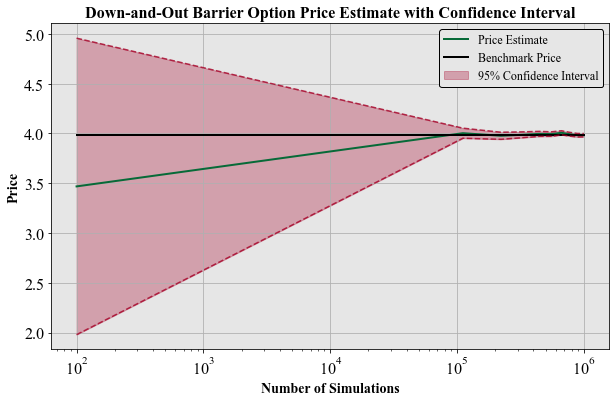

In [26]:
plt.figure(figsize=(10,6))
plt.plot(simulations, DO_prices, color = '#076a38', label='Price Estimate', linewidth=2)
plt.plot(simulations, DO_benchmark_prices, color = 'black', label='Benchmark Price', linewidth=2)
plt.fill_between(simulations, DO_LB_95, DO_UB_95, color='#a50026', alpha=0.3, label='95% Confidence Interval')
plt.plot(simulations, DO_LB_95, color='#a50026', linestyle='dashed', alpha=0.8)
plt.plot(simulations, DO_UB_95, color='#a50026', linestyle='dashed', alpha=0.8)
plt.xscale('log')
plt.xlabel('Number of Simulations', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=14, fontweight='bold')
plt.title('Down-and-Out Barrier Option Price Estimate with Confidence Interval',
          fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=12, fancybox=True, framealpha=1, edgecolor='black', facecolor='#e6e6e6')
plt.grid(True)
plt.gca().set_facecolor('#e6e6e6')
plt.show()

Down-and-In Call Option


In [28]:
# PLot the confidence interval and the price estimate for a down and out barrier option with different amounts of simulaitons
simulations = np.linspace(100, 1000000, 10)

DI_prices = []
DI_LB_95 = []
DI_UB_95 = []

for simulation in simulations:
    option_pricer = BarrierOptionPricer(S0=100, K=105, H=90, T=0.2, r=0.1, sigma=0.3, q= 0, simulations= int(simulation), steps=50)
    path = option_pricer._simulate_naive_paths()
    price = option_pricer.NaiveDICallprice(path, Graph=False, Annot = False)
    DI_prices.append(price[0])
    DI_LB_95.append(price[0] - 1.96 * price[1])
    DI_UB_95.append(price[0] + 1.96 * price[1])

option_pricer.BarrierCorrection()
benchmark_price = option_pricer.ClosedForm_Down_Call()
DI_benchmark_prices = [benchmark_price[0]] * len(simulations)

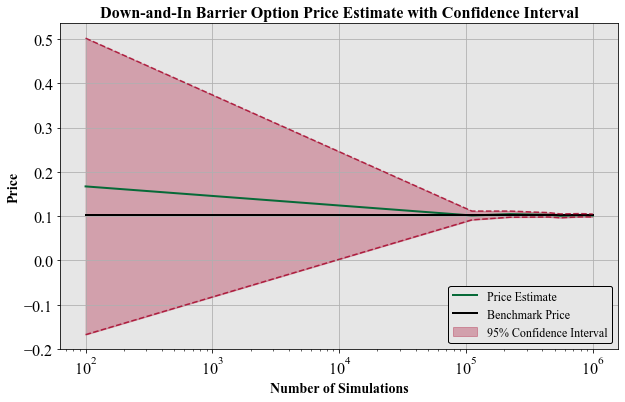

In [29]:
plt.figure(figsize=(10,6))
plt.plot(simulations, DI_prices, color = '#076a38', label='Price Estimate', linewidth=2)
plt.plot(simulations, DI_benchmark_prices, color = 'black', label='Benchmark Price', linewidth=2)
plt.fill_between(simulations, DI_LB_95, DI_UB_95, color='#a50026', alpha=0.3, label='95% Confidence Interval')
plt.plot(simulations, DI_LB_95, color='#a50026', linestyle='dashed', alpha=0.8)
plt.plot(simulations, DI_UB_95, color='#a50026', linestyle='dashed', alpha=0.8)
plt.xscale('log')
plt.xlabel('Number of Simulations', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=14, fontweight='bold')
plt.title('Down-and-In Barrier Option Price Estimate with Confidence Interval',
          fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12, fancybox=True, framealpha=1, edgecolor='black', facecolor='#e6e6e6')
plt.grid(True)
plt.gca().set_facecolor('#e6e6e6')
plt.show()

For the Down-and-in montecasrol simulation, most of the trajectories end up as a Zero-payoff option. Hence there is a lot of computational efforts lost in the simulation process. Motivates changing the drift term of the underlying price change, AKA importance sampling.


### How Do Naive Monte Carlo Simulations fare with Deep Out of the Money options (Option value close to zero)?


In [4]:
option_pricer = BarrierOptionPricer(S0=100, K=115, H=85, T=0.2, r=0.1, sigma=0.3, q=0, simulations=100000, steps=50)
path = option_pricer._simulate_naive_paths()
MC_downOutCall = option_pricer.NaiveDOCallprice(path, Graph=False)

----------------------------------------------------------------------
              European Down-and-Out Call Option Pricing               
----------------------------------------------------------------------
Call Value:                    $1.4524
Standard Error (SE):           ±0.0155
Total Simulations (Paths):     100,000
Successful Paths:              16,988 (16.99%)
----------------------------------------------------------------------
Computation Time:              0.2005 seconds
----------------------------------------------------------------------


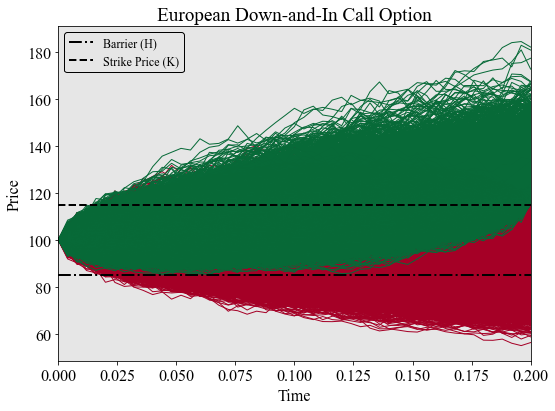

In [15]:
plotdata = MC_downOutCall[2]

plt.figure(figsize=(8, 6)) 
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

# First subplot: Path Visualization
palette = {True: '#076a38', False: '#a50026'}
sns.lineplot(x='times', y='value', units='variable', estimator=None, lw=1., data=plotdata, hue = 'successful paths', legend=False, palette=palette)
plt.plot([0, 0.2], [85, 85], linestyle='-.', linewidth=2.0, color='black', label='Barrier (H)')
plt.plot([0, 0.2], [115, 115], linestyle='--', linewidth=2.0, color='black', label='Strike Price (K)')
plt.xlim(0, 0.2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Down-and-In Call Option')
plt.gca().set_facecolor('#e6e6e6')
plt.legend(loc='upper left', fancybox=True, framealpha=1, facecolor='#e6e6e6', edgecolor='black', fontsize='12')
plt.tight_layout()

In [5]:
path = option_pricer._simulate_naive_paths()
MC_downInCall = option_pricer.NaiveDICallprice(path, Graph=False)

----------------------------------------------------------------------
               European Down-and-In Call Option Pricing               
----------------------------------------------------------------------
Call Value:                    $0.0004
Standard Error (SE):           ±0.0004
Total Simulations (Paths):     100,000
Successful Paths:              13 (0.01%)
----------------------------------------------------------------------
Computation Time:              0.1165 seconds
----------------------------------------------------------------------


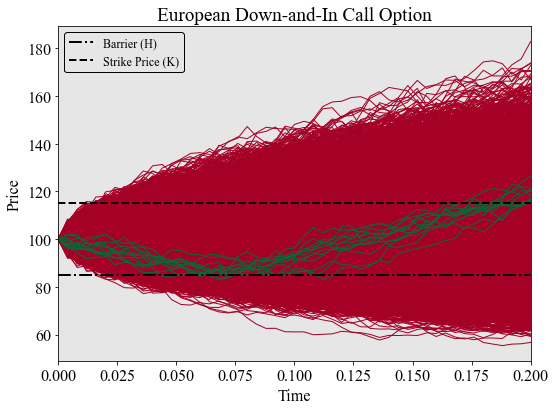

In [12]:
plotdata = MC_downInCall[2]

plt.figure(figsize=(8, 6)) 
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

# First subplot: Path Visualization
palette = {True: '#076a38', False: '#a50026'}
sns.lineplot(x='times', y='value', units='variable', estimator=None, lw=1., data=plotdata, hue = 'successful paths', legend=False, palette=palette)
plt.plot([0, 0.2], [85, 85], linestyle='-.', linewidth=2.0, color='black', label='Barrier (H)')
plt.plot([0, 0.2], [115, 115], linestyle='--', linewidth=2.0, color='black', label='Strike Price (K)')
plt.xlim(0, 0.2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Down-and-In Call Option')
plt.gca().set_facecolor('#e6e6e6')
plt.legend(loc='upper left', fancybox=True, framealpha=1, facecolor='#e6e6e6', edgecolor='black', fontsize='12')
plt.tight_layout()

In [6]:
IS_downOutCall = option_pricer.Importance_Sample_DO_Call_Price(Graph=False, Annot = True)

----------------------------------------------------------------------
              European Down-and-Out Call Option Pricing               
----------------------------------------------------------------------
Call Value:                    $2.9640
Standard Error (SE):           ±2.1449
Total Simulations (Paths):     100,000
Successful Paths:              2 (0.00%)
----------------------------------------------------------------------
Computation Time:              13.47 seconds
----------------------------------------------------------------------


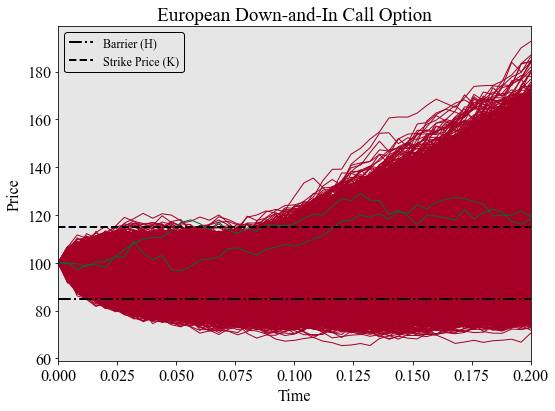

In [13]:
plotdata = IS_downOutCall[2]

plt.figure(figsize=(8, 6)) 
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

# First subplot: Path Visualization
palette = {True: '#076a38', False: '#a50026'}
sns.lineplot(x='times', y='value', units='variable', estimator=None, lw=1., data=plotdata, hue = 'successful paths', legend=False, palette=palette)
plt.plot([0, 0.2], [85, 85], linestyle='-.', linewidth=2.0, color='black', label='Barrier (H)')
plt.plot([0, 0.2], [115, 115], linestyle='--', linewidth=2.0, color='black', label='Strike Price (K)')
plt.xlim(0, 0.2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Down-and-Out Call Option with Importance Sampling')
plt.gca().set_facecolor('#e6e6e6')
plt.legend(loc='upper left', fancybox=True, framealpha=1, facecolor='#e6e6e6', edgecolor='black', fontsize='12')
plt.tight_layout()

In [7]:
IS_downInCall = option_pricer.Importance_Sample_DI_Call_Price(Graph=False, Annot = True)

----------------------------------------------------------------------
               European Down-and-In Call Option Pricing               
----------------------------------------------------------------------
Call Value:                    $0.0006
Standard Error (SE):           ±0.0000
Total Simulations (Paths):     100,000
Successful Paths:              36,671 (36.67%)
----------------------------------------------------------------------
Computation Time:              12.6637 seconds
----------------------------------------------------------------------


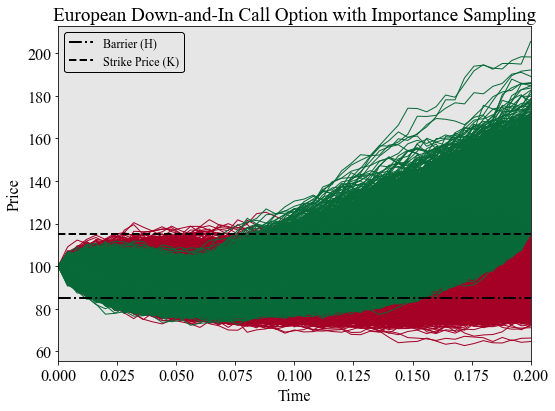

In [14]:
plotdata = IS_downInCall[2]

plt.figure(figsize=(8, 6)) 
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

# First subplot: Path Visualization
palette = {True: '#076a38', False: '#a50026'}
sns.lineplot(x='times', y='value', units='variable', estimator=None, lw=1., data=plotdata, hue = 'successful paths', legend=False, palette=palette)
plt.plot([0, 0.2], [85, 85], linestyle='-.', linewidth=2.0, color='black', label='Barrier (H)')
plt.plot([0, 0.2], [115, 115], linestyle='--', linewidth=2.0, color='black', label='Strike Price (K)')
plt.xlim(0, 0.2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('European Down-and-In Call Option with Importance Sampling')
plt.gca().set_facecolor('#e6e6e6')
plt.legend(loc='upper left', fancybox=True, framealpha=1, facecolor='#e6e6e6', edgecolor='black', fontsize='12')
plt.tight_layout()

In [17]:
option_pricer = BarrierOptionPricer(S0=100, K=115, H=85, T=0.2, r=0.1, sigma=0.3, q=0, simulations=100000, steps=50)
option_pricer.BarrierCorrection()
DownInCall, DownOutCall = option_pricer.ClosedForm_Down_Call()

In [16]:
data = {'Type': ['Down-and-In Call', 'Down-and-Out Call'],
        'Closed-Form Price': [DownInCall, DownOutCall],
        'Naive Monte Carlo Price': [MC_downInCall[0], MC_downOutCall[0]],
        '% Difference Naive MC' : [abs((MC_downInCall[0] - DownInCall) / DownInCall), abs((MC_downOutCall[0] - DownOutCall) / DownOutCall)],
        'Importance Sampled Monte Carlo Price': [IS_downInCall[0], IS_downOutCall[0]],
        '% Difference Importance Sampling' : [abs((IS_downInCall[0] - DownInCall) / DownInCall), abs((IS_downOutCall[0] - DownOutCall) / DownOutCall)],}

df = pd.DataFrame(data)

df['% Difference Naive MC'] = df['% Difference Naive MC'].apply(lambda x: f"{round(x * 100, 2)}%")
df['% Difference Importance Sampling'] = df['% Difference Importance Sampling'].apply(lambda x: f"{round(x * 100, 2)}%")

df

,Type,Closed-Form Price,Naive Monte Carlo Price,% Difference Naive MC,Importance Sampled Monte Carlo Price,% Difference Importance Sampling
0,Down-and-In Call,0.000612,0.000421,31.17%,0.000601,1.75%
1,Down-and-Out Call,1.447335,1.452432,0.35%,2.964011,104.79%


### Investigating Variance of Naive Monte Carlo Estimates Vs. Importance Sampling Estimates


Sensitivity Analysis of Down-and-In Variance for different Strike prices (K) and Barrier levels (H)


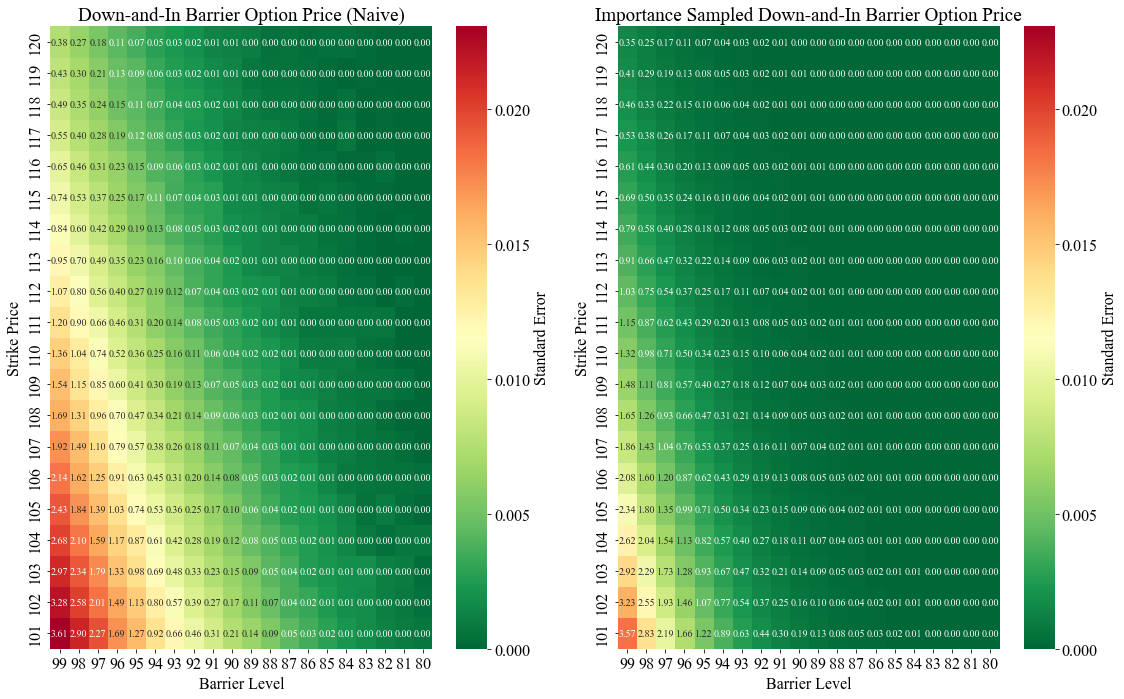

In [3]:
Ks = np.linspace(101, 120, 20)
Hs = np.linspace(80, 99, 20)

naive_prices = np.zeros((len(Ks), len(Hs)))
naive_stderrors = np.zeros((len(Ks), len(Hs)))

IS_prices = np.zeros((len(Ks), len(Hs)))
IS_stderrors = np.zeros((len(Ks), len(Hs)))

# Monte Carlo simulation for each combination of K and H
for i, K in enumerate(Ks):
    for j, H in enumerate(Hs):
        option_pricer = BarrierOptionPricer(S0=100, K=K, H=H, T=0.2, r=0.1, sigma=0.3, q=0, simulations=100000, steps=50)
        path = option_pricer._simulate_naive_paths()
        price = option_pricer.NaiveDICallprice(path, Graph=False, Annot = False)
        naive_prices[i, j] = round(price[0], 2)
        naive_stderrors[i, j] = price[1]  
        
# Importance Sampled Monte Carlo simulation for each combination of K and H
for i, K in enumerate(Ks):
    for j, H in enumerate(Hs):
        option_pricer = BarrierOptionPricer(S0=100, K=K, H=H, T=0.2, r=0.1, sigma=0.3, q=0, simulations=100000, steps=50)
        price = option_pricer.Importance_Sample_DI_Call_Price(Graph=False, Annot = False)
        IS_prices[i, j] = round(price[0], 2) 
        IS_stderrors[i, j] = price[1] 


# Calculate global min and max for standard errors
global_min = min(naive_stderrors.min(), IS_stderrors.min())
global_max = max(naive_stderrors.max(), IS_stderrors.max())

# Create a heatmap for the prices for naive and importance sampled
plt.figure(figsize=(16, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"

# First subplot: Naive Method
plt.subplot(1, 2, 1)
sns.heatmap(
    naive_stderrors,  # Use standard errors for shading
    xticklabels=[f'{h:.0f}' for h in Hs],
    yticklabels=[f'{k:.0f}' for k in Ks], 
    annot=naive_prices,  # Annotate the heatmap with prices
    fmt='.2f', 
    cmap='RdYlGn_r',
    annot_kws={'size': 10},
    cbar_kws={'label': 'Standard Error'},
    vmin=global_min, 
    vmax=global_max,
)
plt.xlabel('Barrier Level')
plt.ylabel('Strike Price')
plt.title('Down-and-In Barrier Option Price (Naive)')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Second subplot: Importance Sampling Method
plt.subplot(1, 2, 2) 
sns.heatmap(
    IS_stderrors,  # Use standard errors for shading
    xticklabels=[f'{h:.0f}' for h in Hs],
    yticklabels=[f'{k:.0f}' for k in Ks],
    annot=IS_prices,  # Annotate the heatmap with prices
    fmt='.2f', 
    cmap='RdYlGn_r',
    annot_kws={'size': 10},
    cbar_kws={'label': 'Standard Error'},
    vmin=global_min, 
    vmax=global_max,
)
plt.xlabel('Barrier Level')
plt.ylabel('Strike Price')
plt.title('Importance Sampled Down-and-In Barrier Option Price')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()